In [16]:
# What do i need to test?
## model
## preprocessing

# How to test them
## Create collection for each test configuration 

# testing function: takes a dataset, encoder and a preprocessing method

# test doc search and paragraph search seperatly?? or together?

# compare results: calculate the similarity between the delivered answer and the exoected one

In [17]:
%reload_ext autoreload
%autoreload 2
import testSearch
from Qdrant import Qdrant
from sentence_transformers import SentenceTransformer
from qdrant_client.http.models import Distance

In [18]:
directory_path = 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS'
pdf_paths = testSearch.find_pdf_files(directory_path)

print("PDF Files found:")
for path in pdf_paths:
    print(path)

PDF Files found:
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\English\Thesis\Bachelorarbit_Elsharkawi_577909.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\English\Uni\HO_Korrektur_2AEO_EN.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\English\Uni\RStPO_3AEO_EN.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\German\chat GPT\Environmental_Conservation_Article_German.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\German\chat GPT\Space_Exploration_Arti

In [19]:
def remove_question_words(text):
    words = text.split(" ")

    english_question_words = {'who', 'whom', 'whose', 'what', 'which', 'where', 'when', 'why', 'how'}
    german_question_words = {'wer', 'wen', 'wem', 'wessen', 'was', 'welcher', 'welche', 'welches', 'wo', 'wann', 'warum', 'wie'}

    filtered_words = [word.lower() for word in words if word.lower() not in (english_question_words | german_question_words)]

    filtered_text = ' '.join(filtered_words)
    print(words)

    return filtered_text

# Example usage:
input_text = "What is the capital of Germany? Wer ist der Präsident? When did this happen?"
filtered_text = remove_question_words(input_text)
print(filtered_text)


['What', 'is', 'the', 'capital', 'of', 'Germany?', 'Wer', 'ist', 'der', 'Präsident?', 'When', 'did', 'this', 'happen?']
is the capital of germany? ist der präsident? did this happen?


# all mini

limit = 256 words

https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

## without document chuking

In [20]:
encoder_allMini = SentenceTransformer("all-MiniLM-L6-v2")

In [21]:
testSearch.encode_dataset(test_name="mini-ml", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_allMini,
                          distance=Distance.COSINE,
                          chunk_size=100000000,
                          remove_stop_words=False,
                          overlap=15)
# time = 42s

user doesn't exist, creating a new collection with the user name: mini-ml
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: mini-ml exists, and has 1 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: mini-ml exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: mini-ml exists, and has 3 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: mini-ml exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: mini-ml exists, and has 5 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: mini-ml exists, and has 6 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\Thesis\Bachelorarbit_Elsharkawi_577909.pdf
user: mini-ml exists, and has 7 vectors
D:

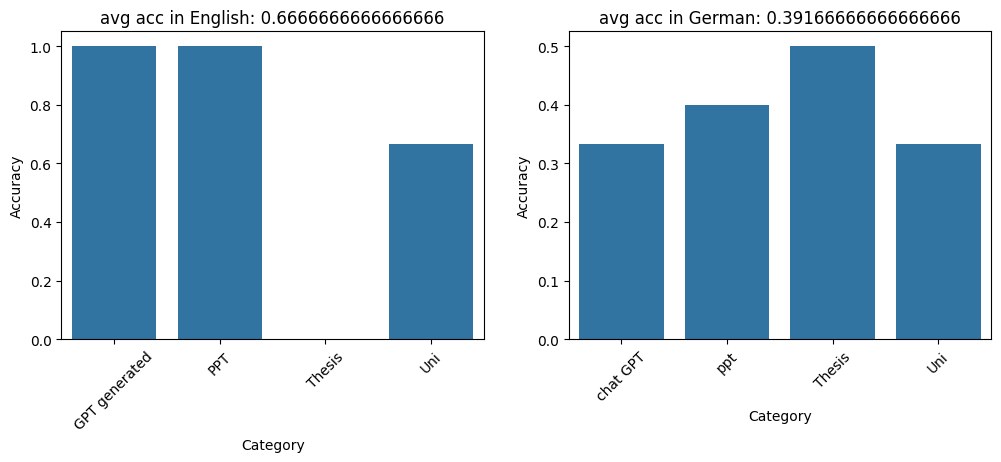

In [22]:
results = testSearch.test_language_model("mini-ml", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_allMini)
testSearch.display_acc_per_lang(results, "accuracy_doc")
# time = 4.5 s

In [23]:
client = Qdrant()
german_gpt = testSearch.read_dataset('D:\\Master\\1.Semester\\Software\\Dataset\\PDFS')['English']['Uni']
for gpt in german_gpt:
    print(f'-------------------{gpt}-----------------------:')
    for qa in german_gpt[gpt]:
        print(qa['Question'])
        answers = client.search("mini-ml", qa['Question'])
        for ans in answers:
            print(ans['doc_name'])
            print(ans['passage'])
        print()
    print('________________________________________________________________________')

-------------------HO_Korrektur_2AEO_EN-----------------------:
What are the special rights and obligations of academic and non-academic staff at HTW Berlin?
HO_Korrektur_2AEO_EN.pdf
Hochschule für Technik und Wirtschaft Berlin (University of Applied Sciences) University Regulations of HTW Berlin (Hochschulordnung der HTW Berlin, henc eforth referred to as the HO) From 16 April 20121, including the correction of 21 August 20122, the first amendment regulation from 9 February 20153, and the second amendment regulation from 1 June 20154. Non-binding English-language versio n, provided for information only. (The German-language versions published in HTW Berl in’s official informatio n circulars are binding). Contents General provisions § 1 Application and scope Fundamental rights and obligations § 2 General rights and obligations § 3 Special rights and obligations of academic and non-academic staff § 4 Special rights and obligati ons of applicants and students Procedural regulations for t

## with document chunking

In [24]:
testSearch.encode_dataset(test_name="mini-ml-chunked", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_allMini,
                          distance=Distance.COSINE,
                          chunk_size=0,
                          remove_stop_words=False,
                          overlap=15)
# time = 2m 25.8s

user doesn't exist, creating a new collection with the user name: mini-ml-chunked
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: mini-ml-chunked exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: mini-ml-chunked exists, and has 3 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: mini-ml-chunked exists, and has 5 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: mini-ml-chunked exists, and has 7 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: mini-ml-chunked exists, and has 11 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: mini-ml-chunked exists, and has 14 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\Thesis\Bachelorarbit_Elshar

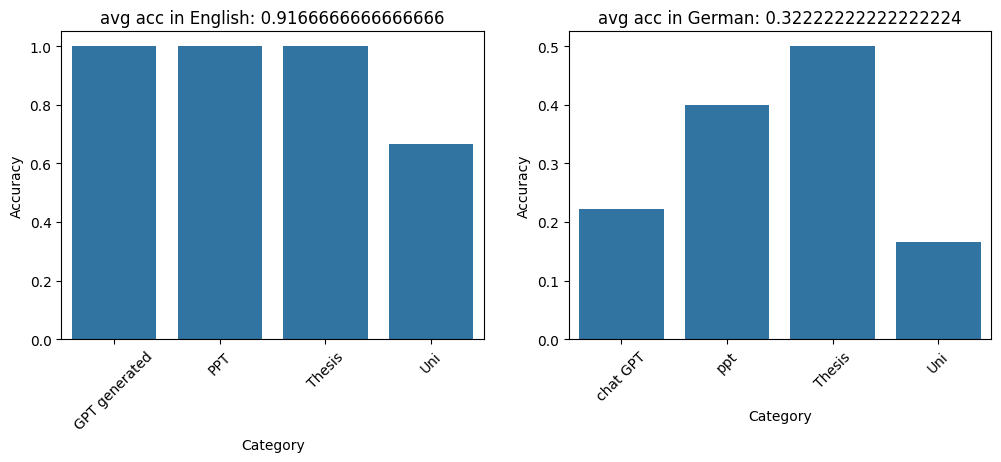

In [25]:
results = testSearch.test_language_model("mini-ml-chunked", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_allMini)
testSearch.display_acc_per_lang(results, "accuracy_doc")
# time = 3.1s

## with stop words removal

In [26]:
testSearch.encode_dataset(test_name="mini-ml-chunked-noStop", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_allMini,
                          distance=Distance.COSINE,
                          chunk_size=0,
                          remove_stop_words=True,
                          overlap=15)
# time = 42s

user doesn't exist, creating a new collection with the user name: mini-ml-chunked-noStop
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: mini-ml-chunked-noStop exists, and has 1 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: mini-ml-chunked-noStop exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: mini-ml-chunked-noStop exists, and has 3 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: mini-ml-chunked-noStop exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: mini-ml-chunked-noStop exists, and has 7 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: mini-ml-chunked-noStop exists, and has 10 vectors
D:\Master\1.Semester\Software\

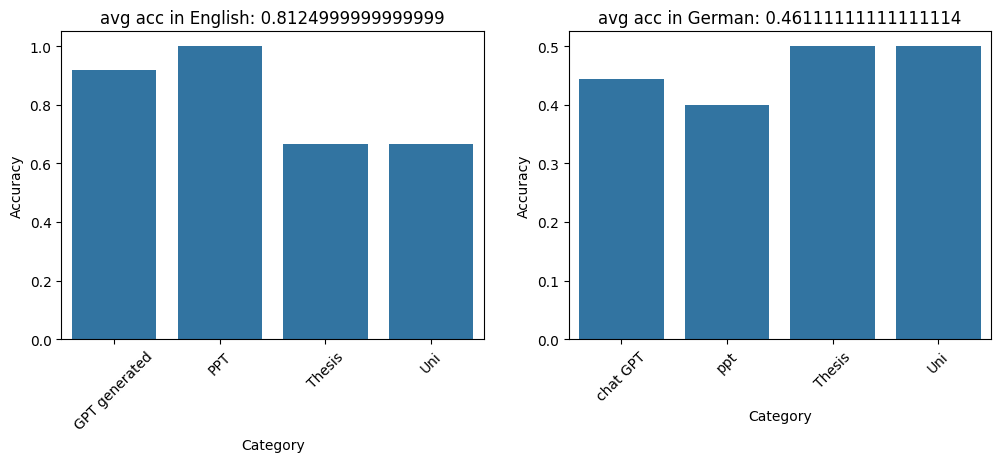

In [27]:
results = testSearch.test_language_model("mini-ml-chunked-noStop", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_allMini)
testSearch.display_acc_per_lang(results, "accuracy_doc")
# time = 3.7s

# distiluse-base-multilingual-cased-v2
https://huggingface.co/sentence-transformers/distiluse-base-multilingual-cased-v2

In [28]:
encoder_distiluse_base = SentenceTransformer('distiluse-base-multilingual-cased-v2')
testSearch.encode_dataset(test_name="distiluse-base", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_distiluse_base,
                          distance=Distance.COSINE,
                          chunk_size=100000000,
                          remove_stop_words=False,
                          overlap=15)
# time = 42s

user doesn't exist, creating a new collection with the user name: distiluse-base
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: distiluse-base exists, and has 1 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: distiluse-base exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: distiluse-base exists, and has 3 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: distiluse-base exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: distiluse-base exists, and has 5 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: distiluse-base exists, and has 6 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\Thesis\Bachelorarbit_Elsharkawi_5779

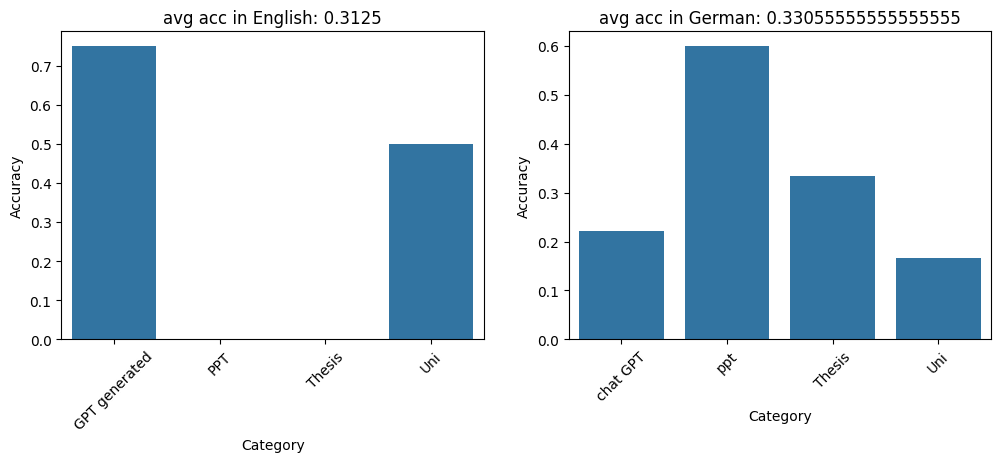

In [29]:
results = testSearch.test_language_model("distiluse-base", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_distiluse_base)
testSearch.display_acc_per_lang(results, "accuracy_doc")

In [30]:
## distiluse-base chunked

In [31]:
testSearch.encode_dataset(test_name="distiluse-base-chunked", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_distiluse_base,
                          distance=Distance.COSINE,
                          chunk_size=0,
                          remove_stop_words=False,
                          overlap=15)

user doesn't exist, creating a new collection with the user name: distiluse-base-chunked
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: distiluse-base-chunked exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: distiluse-base-chunked exists, and has 7 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: distiluse-base-chunked exists, and has 10 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: distiluse-base-chunked exists, and has 13 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: distiluse-base-chunked exists, and has 21 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: distiluse-base-chunked exists, and has 27 vectors
D:\Master\1.Semester\Softwa

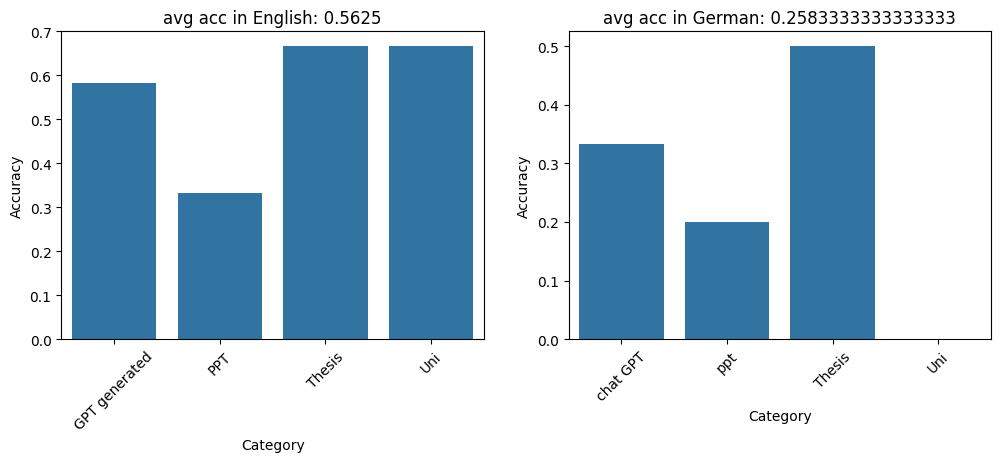

In [32]:
results = testSearch.test_language_model("distiluse-base-chunked", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_distiluse_base)
testSearch.display_acc_per_lang(results, "accuracy_doc")

## chunked no stop words

In [33]:
testSearch.encode_dataset(test_name="distiluse-base-chunked-noStop", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_distiluse_base,
                          distance=Distance.COSINE,
                          chunk_size=0,
                          remove_stop_words=True,
                          overlap=15)

user doesn't exist, creating a new collection with the user name: distiluse-base-chunked-noStop
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: distiluse-base-chunked-noStop exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: distiluse-base-chunked-noStop exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: distiluse-base-chunked-noStop exists, and has 6 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: distiluse-base-chunked-noStop exists, and has 8 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: distiluse-base-chunked-noStop exists, and has 14 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: distiluse-base-chunked-noStop exists,

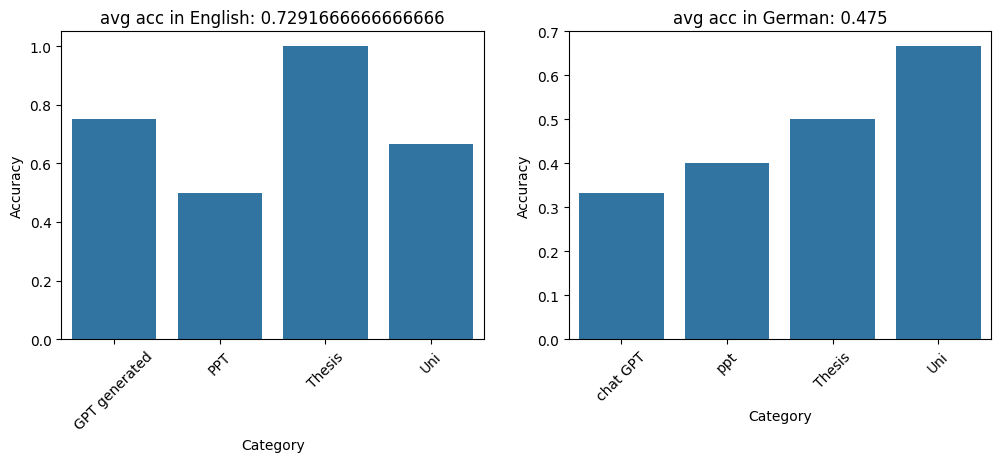

In [34]:
results = testSearch.test_language_model("distiluse-base-chunked-noStop", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_distiluse_base)
testSearch.display_acc_per_lang(results, "accuracy_doc")

# all-mpnet-base-v2
Note: took longer time than all mini
https://huggingface.co/sentence-transformers/all-mpnet-base-v2

In [35]:
encoder_all_mpnet_base= SentenceTransformer('all-mpnet-base-v2')
testSearch.encode_dataset(test_name="all-mpnet-base", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_all_mpnet_base,
                          distance=Distance.COSINE,
                          chunk_size=100000000,
                          remove_stop_words=False,
                          overlap=15)

user doesn't exist, creating a new collection with the user name: all-mpnet-base
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: all-mpnet-base exists, and has 1 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: all-mpnet-base exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: all-mpnet-base exists, and has 3 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: all-mpnet-base exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: all-mpnet-base exists, and has 5 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: all-mpnet-base exists, and has 6 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\Thesis\Bachelorarbit_Elsharkawi_5779

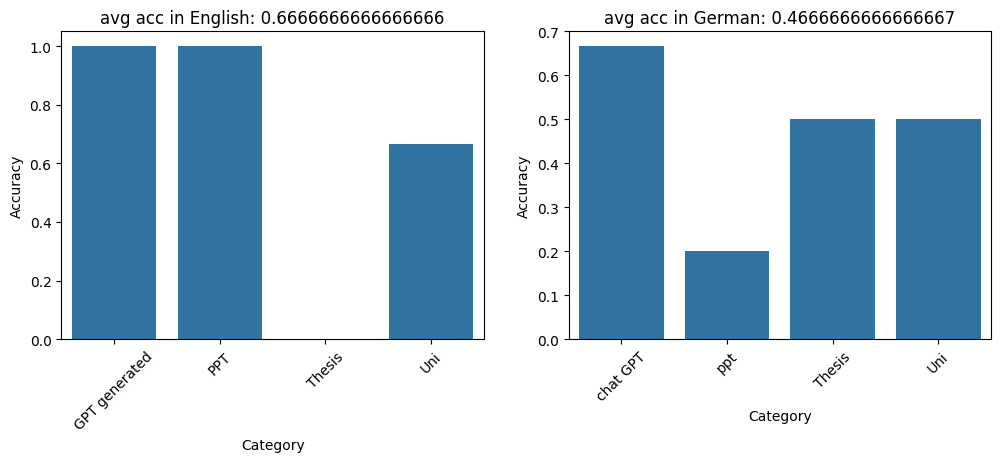

In [36]:
results = testSearch.test_language_model("all-mpnet-base", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_all_mpnet_base)
testSearch.display_acc_per_lang(results, "accuracy_doc")

## chunked

In [37]:
encoder_all_mpnet_base= SentenceTransformer('all-mpnet-base-v2')
testSearch.encode_dataset(test_name="all-mpnet-base-chunked", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_all_mpnet_base,
                          distance=Distance.COSINE,
                          chunk_size=0,
                          remove_stop_words=True,
                          overlap=15)

user doesn't exist, creating a new collection with the user name: all-mpnet-base-chunked
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: all-mpnet-base-chunked exists, and has 1 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: all-mpnet-base-chunked exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: all-mpnet-base-chunked exists, and has 3 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: all-mpnet-base-chunked exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: all-mpnet-base-chunked exists, and has 6 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: all-mpnet-base-chunked exists, and has 8 vectors
D:\Master\1.Semester\Software\D

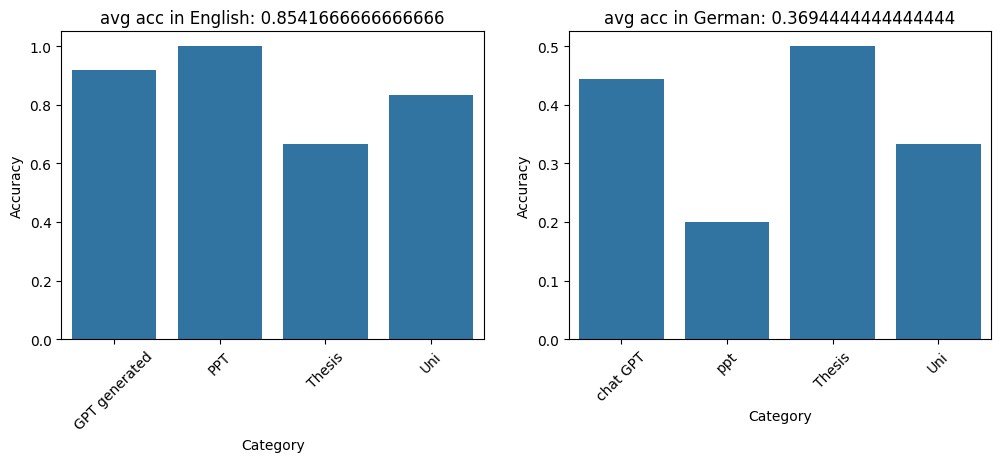

In [38]:
results = testSearch.test_language_model("all-mpnet-base-chunked", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_all_mpnet_base)
testSearch.display_acc_per_lang(results, "accuracy_doc")

# multi-qa-mpnet-base-dot-v1
https://huggingface.co/sentence-transformers/multi-qa-mpnet-base-dot-v1

In [39]:
encoder_multi_qa_mpnet= SentenceTransformer('multi-qa-mpnet-base-dot-v1')
testSearch.encode_dataset(test_name="qa-mpnet", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_multi_qa_mpnet,
                          distance=Distance.COSINE,
                          chunk_size=10000000000,
                          remove_stop_words=False,
                          overlap=15)

user doesn't exist, creating a new collection with the user name: qa-mpnet
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: qa-mpnet exists, and has 1 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: qa-mpnet exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: qa-mpnet exists, and has 3 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: qa-mpnet exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: qa-mpnet exists, and has 5 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: qa-mpnet exists, and has 6 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\Thesis\Bachelorarbit_Elsharkawi_577909.pdf
user: qa-mpnet exists, and has 7 ve

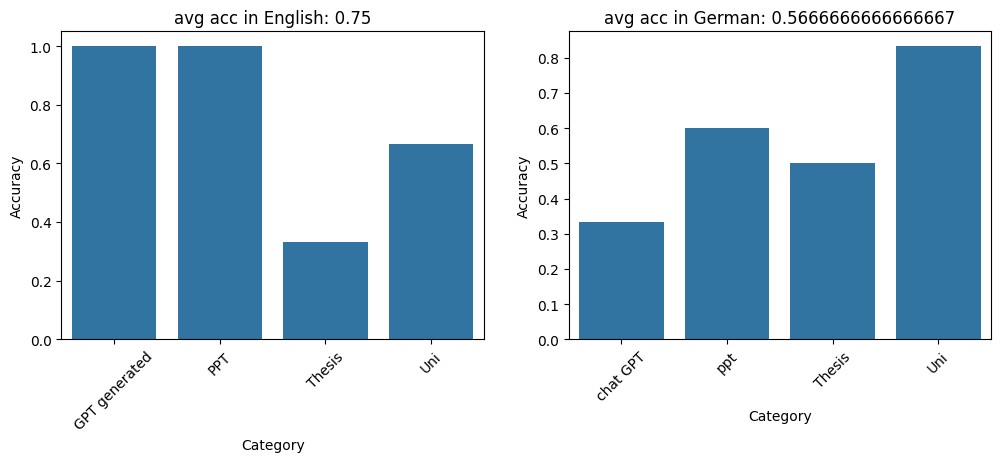

In [40]:
results = testSearch.test_language_model("qa-mpnet", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_multi_qa_mpnet)
testSearch.display_acc_per_lang(results, "accuracy_doc")

## chunked

In [41]:
encoder_multi_qa_mpnet= SentenceTransformer('multi-qa-mpnet-base-dot-v1')
testSearch.encode_dataset(test_name="qa-mpnet-chunked", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_multi_qa_mpnet,
                          distance=Distance.COSINE,
                          chunk_size=0,
                          remove_stop_words=False,
                          overlap=15)

user doesn't exist, creating a new collection with the user name: qa-mpnet-chunked
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: qa-mpnet-chunked exists, and has 1 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: qa-mpnet-chunked exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: qa-mpnet-chunked exists, and has 3 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: qa-mpnet-chunked exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: qa-mpnet-chunked exists, and has 6 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: qa-mpnet-chunked exists, and has 8 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\Thesis\Bachelorarbit_E

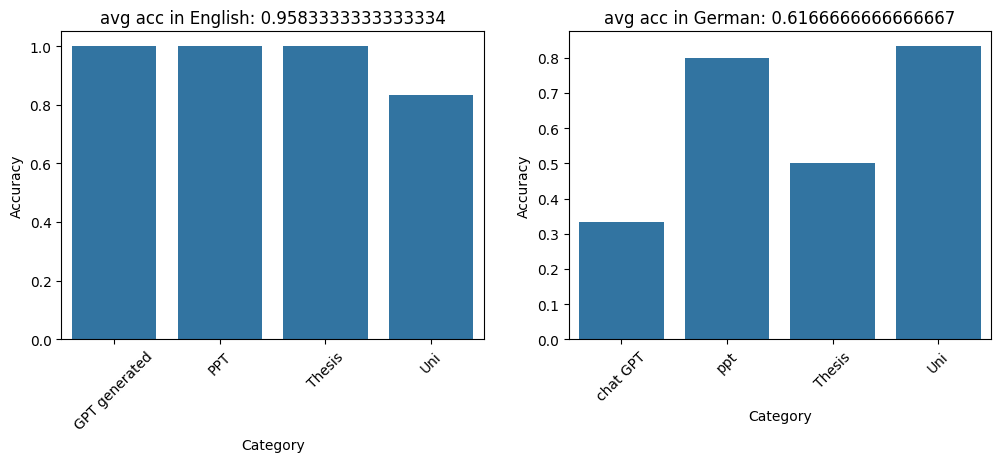

In [42]:
results = testSearch.test_language_model("qa-mpnet-chunked", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_multi_qa_mpnet)
testSearch.display_acc_per_lang(results, "accuracy_doc")
## 7.2 sec

## dot

In [43]:
testSearch.encode_dataset(test_name="qa-mpnet-chunked-dot", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_multi_qa_mpnet,
                          distance=Distance.DOT,
                          chunk_size=0,
                          remove_stop_words=False,
                          overlap=15)

user doesn't exist, creating a new collection with the user name: qa-mpnet-chunked-dot
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: qa-mpnet-chunked-dot exists, and has 1 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: qa-mpnet-chunked-dot exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: qa-mpnet-chunked-dot exists, and has 3 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: qa-mpnet-chunked-dot exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: qa-mpnet-chunked-dot exists, and has 6 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: qa-mpnet-chunked-dot exists, and has 8 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\En

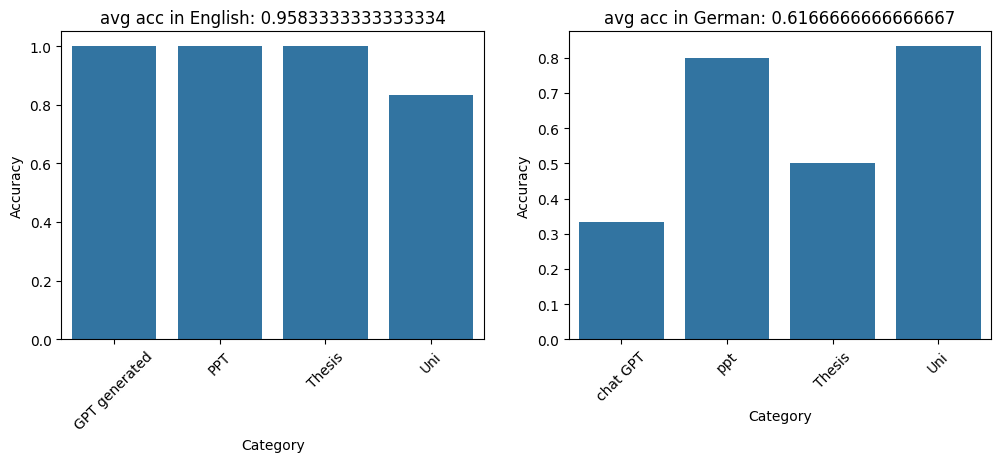

In [44]:
results = testSearch.test_language_model("qa-mpnet-chunked-dot", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_multi_qa_mpnet)
testSearch.display_acc_per_lang(results, "accuracy_doc")
# 7.6 secs

## overlap 30

In [45]:
testSearch.encode_dataset(test_name="qa-mpnet-chunked-dot-30", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_multi_qa_mpnet,
                          distance=Distance.DOT,
                          chunk_size=0,
                          remove_stop_words=False,
                          overlap=30)

user doesn't exist, creating a new collection with the user name: qa-mpnet-chunked-dot-30
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: qa-mpnet-chunked-dot-30 exists, and has 1 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: qa-mpnet-chunked-dot-30 exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: qa-mpnet-chunked-dot-30 exists, and has 3 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: qa-mpnet-chunked-dot-30 exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: qa-mpnet-chunked-dot-30 exists, and has 6 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: qa-mpnet-chunked-dot-30 exists, and has 8 vectors
D:\Master\1.Semester\Sof

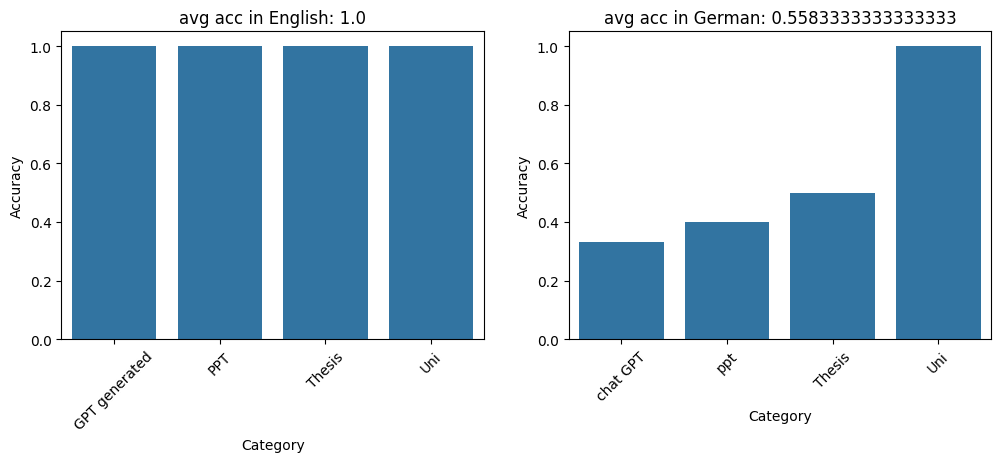

In [46]:
# remove stopwords from question
results = testSearch.test_language_model("qa-mpnet-chunked-dot-30", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_multi_qa_mpnet)
testSearch.display_acc_per_lang(results, "accuracy_doc")
# 8.6 secs

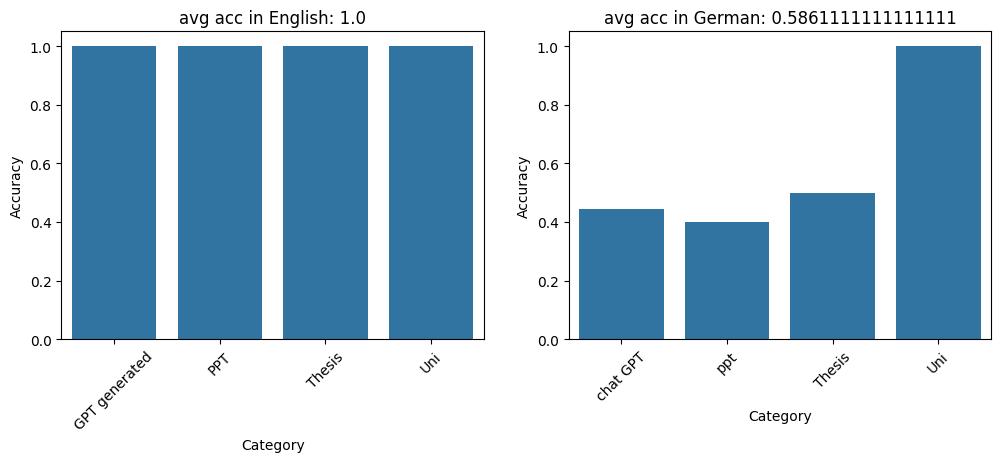

In [47]:
# leave stopwords in question
results = testSearch.test_language_model("qa-mpnet-chunked-dot-30", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_multi_qa_mpnet, False)
testSearch.display_acc_per_lang(results, "accuracy_doc")
# 7.6 secs

## noStop

In [48]:
testSearch.encode_dataset(test_name="qa-mpnet-chunked-dot-noStop", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_multi_qa_mpnet,
                          distance=Distance.DOT,
                          chunk_size=0,
                          remove_stop_words=True,
                          overlap=15)

user doesn't exist, creating a new collection with the user name: qa-mpnet-chunked-dot-noStop
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: qa-mpnet-chunked-dot-noStop exists, and has 1 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: qa-mpnet-chunked-dot-noStop exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: qa-mpnet-chunked-dot-noStop exists, and has 3 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: qa-mpnet-chunked-dot-noStop exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: qa-mpnet-chunked-dot-noStop exists, and has 6 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: qa-mpnet-chunked-dot-noStop exists, and has 8 vect

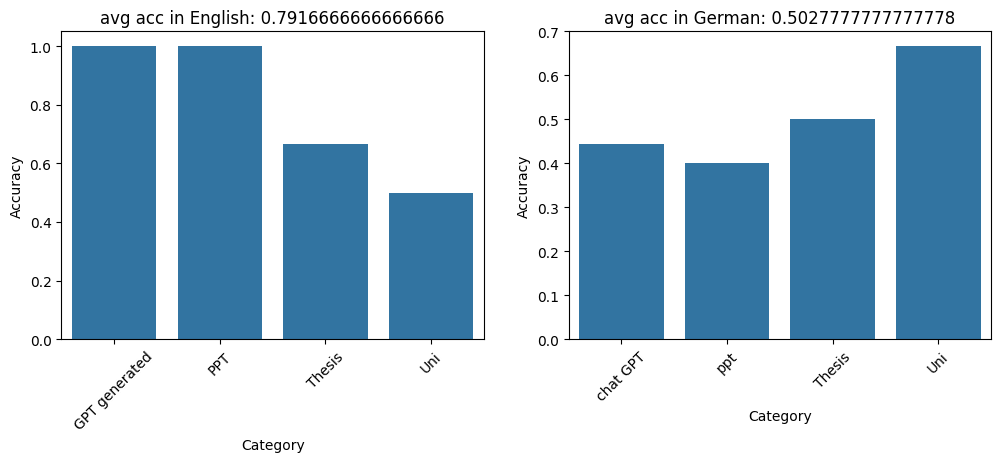

In [49]:
results = testSearch.test_language_model("qa-mpnet-chunked-dot-noStop", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_multi_qa_mpnet,True)
testSearch.display_acc_per_lang(results, "accuracy_doc")
# 7.6 secs

# multi-qa-MiniLM-L6-dot-v1

## cos

In [50]:
encoder_multi_qa_MiniLM= SentenceTransformer('multi-qa-MiniLM-L6-dot-v1')
testSearch.encode_dataset(test_name="qa-MiniLM-cos", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_multi_qa_MiniLM,
                          distance=Distance.COSINE,
                          chunk_size=0,
                          remove_stop_words=False,
                          overlap=20)

user doesn't exist, creating a new collection with the user name: qa-MiniLM-cos
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: qa-MiniLM-cos exists, and has 1 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: qa-MiniLM-cos exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: qa-MiniLM-cos exists, and has 3 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: qa-MiniLM-cos exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: qa-MiniLM-cos exists, and has 6 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: qa-MiniLM-cos exists, and has 8 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\Thesis\Bachelorarbit_Elsharkawi_577909.pdf


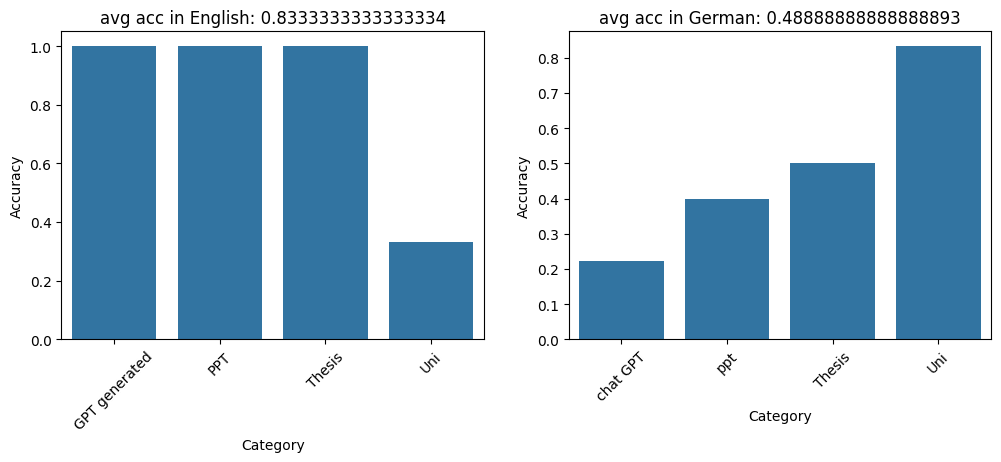

In [51]:
results = testSearch.test_language_model("qa-MiniLM-cos", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_multi_qa_MiniLM)
testSearch.display_acc_per_lang(results, "accuracy_doc")


## DOT

In [52]:
encoder_multi_qa_MiniLM= SentenceTransformer('multi-qa-MiniLM-L6-dot-v1')
testSearch.encode_dataset(test_name="qa-MiniLM", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_multi_qa_MiniLM,
                          distance=Distance.DOT,
                          chunk_size=0,
                          remove_stop_words=False,
                          overlap=15)

user doesn't exist, creating a new collection with the user name: qa-MiniLM
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: qa-MiniLM exists, and has 1 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: qa-MiniLM exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: qa-MiniLM exists, and has 3 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: qa-MiniLM exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: qa-MiniLM exists, and has 6 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: qa-MiniLM exists, and has 8 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\Thesis\Bachelorarbit_Elsharkawi_577909.pdf
user: qa-MiniLM exists, and 

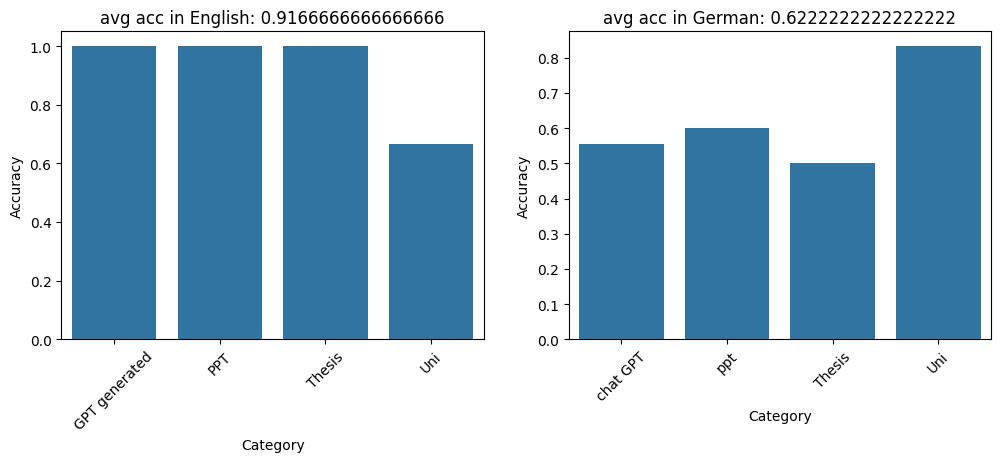

In [53]:
results = testSearch.test_language_model("qa-MiniLM", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_multi_qa_MiniLM)
testSearch.display_acc_per_lang(results, "accuracy_doc")
# 4.6 secs

## overlap 30

In [56]:
encoder_multi_qa_MiniLM= SentenceTransformer('multi-qa-MiniLM-L6-dot-v1')
testSearch.encode_dataset(test_name="qa-MiniLM-30", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_multi_qa_MiniLM,
                          distance=Distance.DOT,
                          chunk_size=0,
                          remove_stop_words=False,
                          overlap=30)

user doesn't exist, creating a new collection with the user name: qa-MiniLM-30
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: qa-MiniLM-30 exists, and has 1 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: qa-MiniLM-30 exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: qa-MiniLM-30 exists, and has 3 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: qa-MiniLM-30 exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: qa-MiniLM-30 exists, and has 6 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: qa-MiniLM-30 exists, and has 8 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\Thesis\Bachelorarbit_Elsharkawi_577909.pdf
user: q

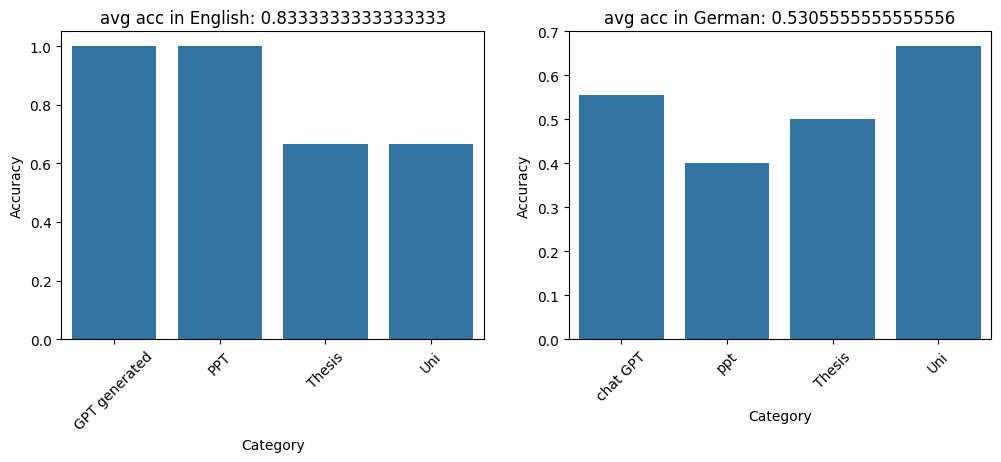

In [57]:
results = testSearch.test_language_model("qa-MiniLM-30", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_multi_qa_MiniLM)
testSearch.display_acc_per_lang(results, "accuracy_doc")
# 2.7 secs

In [58]:
encoder_multi_qa_MiniLM.max_seq_length

512

## no stop

In [54]:
testSearch.encode_dataset(test_name="qa-MiniLM-noStop", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_multi_qa_MiniLM,
                          distance=Distance.DOT,
                          chunk_size=0,
                          remove_stop_words=True,
                          overlap=15)

user doesn't exist, creating a new collection with the user name: qa-MiniLM-noStop
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: qa-MiniLM-noStop exists, and has 1 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: qa-MiniLM-noStop exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: qa-MiniLM-noStop exists, and has 3 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: qa-MiniLM-noStop exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: qa-MiniLM-noStop exists, and has 6 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: qa-MiniLM-noStop exists, and has 8 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\Thesis\Bachelorarbit_E

In [15]:
results = testSearch.test_language_model("qa-MiniLM-noStop", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_multi_qa_MiniLM)
testSearch.display_acc_per_lang(results, "accuracy_doc")

NameError: name 'encoder_multi_qa_MiniLM' is not defined

# Trying BERT

In [ ]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from qdrant_client import QdrantClient
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
model = AutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
client = QdrantClient(host="localhost", port=6333)
collection_name = "documents"

def segment_document(document, max_chunk_size=512):
    tokens = tokenizer.tokenize(document)
    return [tokens[i:i + max_chunk_size] for i in range(0, len(tokens), max_chunk_size)]

def get_embeddings(text_chunks):
    embeddings = []
    for chunk in text_chunks:
        inputs = tokenizer(" ".join(chunk), return_tensors="pt", truncation=True, padding='max_length', max_length=512)
        outputs = model(**inputs)
        print(outputs)
        chunk_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy().flatten()
        embeddings.append(chunk_embedding)
    return embeddings


document_1 = "Beyond the Horizon: The New Era of Space Exploration Introduction Space exploration has entered a new era, marked by groundbreaking missions and technological advancements. This article explores the latest developments in space travel, highlighting the achievements of both government space agencies and private enterprises. Section 1: Recent Space Missions We start by reviewing recent notable space missions, including Mars rovers, lunar probes, and missions to the outer planets. The focus is on the objectives, discoveries, and technological innovations of these missions. Section 2: The Role of Private Companies Private companies are playing an increasingly significant role in space exploration. We examine the contributions of companies like SpaceX, Blue Origin, and others, discussing their missions, visions for space travel, and the impact of commercialization on the future of space exploration. Section 3: International CollaborationSpace exploration is a global endeavor. This section delves into the collaborations between different countries in space missions, including the International Space Station, joint missions to explor asteroids and comts, and future plans for international lunar bases. Section 4: The Future of Space Exploration We look ahead to the future of space exploration, considering upcoming missions, the possibility of human settlement on other planets, and the ongoing search for extraterrestrial life. The challenges and ethical considerations of space travel are also discussed. Conclusion The new era of space exploration is pushing the boundaries of human knowledge and capability. As we continue to explore the cosmos, the journey promises not only scientific advancements but alsoa deeper understanding of our place in the universe. Beyond the Horizon: The New Era of Space Exploration Introduction Space exploration has entered a new era, marked by groundbreaking missions and technological advancements. This article explores the latest developments in space travel, highlighting the achievements of both government space agencies and private enterprises. Section 1: Recent Space Missions We start by reviewing recent notable space missions, including Mars rovers, lunar probes, and missions to the outer planets. The focus is on the objectives, discoveries, and technological innovations of these missions. Section 2: The Role of Private Companies Private companies are playing an increasingly significant role in space exploration. We examine the contributions of companies like SpaceX, Blue Origin, and others, discussing their missions, visions for space travel, and the impact of commercialization on the future of space exploration. Section 3: International CollaborationSpace exploration is a global endeavor. This section delves into the collaborations between different countries in space missions, including the International Space Station, joint missions to explor asteroids and comts, and future plans for international lunar bases. Section 4: The Future of Space Exploration We look ahead to the future of space exploration, considering upcoming missions, the possibility of human settlement on other planets, and the ongoing search for extraterrestrial life. The challenges and ethical considerations of space travel are also discussed. Conclusion The new era of space exploration is pushing the boundaries of human knowledge and capability. As we continue to explore the cosmos, the journey promises not only scientific advancements but alsoa deeper understanding of our place in the universe. Beyond the Horizon: The New Era of Space Exploration Introduction Space exploration has entered a new era, marked by groundbreaking missions and technological advancements. This article explores the latest developments in space travel, highlighting the achievements of both government space agencies and private enterprises. Section 1: Recent Space Missions We start by reviewing recent notable space missions, including Mars rovers, lunar probes, and missions to the outer planets. The focus is on the objectives, discoveries, and technological innovations of these missions. Section 2: The Role of Private Companies Private companies are playing an increasingly significant role in space exploration. We examine the contributions of companies like SpaceX, Blue Origin, and others, discussing their missions, visions for space travel, and the impact of commercialization on the future of space exploration. Section 3: International CollaborationSpace exploration is a global endeavor. This section delves into the collaborations between different countries in space missions, including the International Space Station, joint missions to explor asteroids and comts, and future plans for international lunar bases. Section 4: The Future of Space Exploration We look ahead to the future of space exploration, considering upcoming missions, the possibility of human settlement on other planets, and the ongoing search for extraterrestrial life. The challenges and ethical considerations of space travel are also discussed. Conclusion The new era of space exploration is pushing the boundaries of human knowledge and capability. As we continue to explore the cosmos, the journey promises not only scientific advancements but alsoa deeper understanding of our place in the universe. Beyond the Horizon: The New Era of Space Exploration Introduction Space exploration has entered a new era, marked by groundbreaking missions and technological advancements. This article explores the latest developments in space travel, highlighting the achievements of both government space agencies and private enterprises. Section 1: Recent Space Missions We start by reviewing recent notable space missions, including Mars rovers, lunar probes, and missions to the outer planets. The focus is on the objectives, discoveries, and technological innovations of these missions. Section 2: The Role of Private Companies Private companies are playing an increasingly significant role in space exploration. We examine the contributions of companies like SpaceX, Blue Origin, and others, discussing their missions, visions for space travel, and the impact of commercialization on the future of space exploration. Section 3: International CollaborationSpace exploration is a global endeavor. This section delves into the collaborations between different countries in space missions, including the International Space Station, joint missions to explor asteroids and comts, and future plans for international lunar bases. Section 4: The Future of Space Exploration We look ahead to the future of space exploration, considering upcoming missions, the possibility of human settlement on other planets, and the ongoing search for extraterrestrial life. The challenges and ethical considerations of space travel are also discussed. Conclusion The new era of space exploration is pushing the boundaries of human knowledge and capability. As we continue to explore the cosmos, the journey promises not only scientific advancements but alsoa deeper understanding of our place in the universe."


doc_chunks = segment_document(document_1)
doc_chunks

[['beyond',
  'the',
  'horizon',
  ':',
  'the',
  'new',
  'era',
  'of',
  'space',
  'exploration',
  'introduction',
  'space',
  'exploration',
  'has',
  'entered',
  'a',
  'new',
  'era',
  ',',
  'marked',
  'by',
  'groundbreaking',
  'missions',
  'and',
  'technological',
  'advancement',
  '##s',
  '.',
  'this',
  'article',
  'explores',
  'the',
  'latest',
  'developments',
  'in',
  'space',
  'travel',
  ',',
  'highlighting',
  'the',
  'achievements',
  'of',
  'both',
  'government',
  'space',
  'agencies',
  'and',
  'private',
  'enterprises',
  '.',
  'section',
  '1',
  ':',
  'recent',
  'space',
  'missions',
  'we',
  'start',
  'by',
  'reviewing',
  'recent',
  'notable',
  'space',
  'missions',
  ',',
  'including',
  'mars',
  'rovers',
  ',',
  'lunar',
  'probe',
  '##s',
  ',',
  'and',
  'missions',
  'to',
  'the',
  'outer',
  'planets',
  '.',
  'the',
  'focus',
  'is',
  'on',
  'the',
  'objectives',
  ',',
  'discoveries',
  ',',
  'and',


In [ ]:
len(doc_chunks)

3

In [ ]:
len(doc_chunks[2])

192

In [ ]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from qdrant_client import QdrantClient
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
model = AutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

client = QdrantClient(host="localhost", port=6333)
collection_name = "documents"

def segment_document(document, max_chunk_size=512):
    tokens = tokenizer.tokenize(document)
    return [tokens[i:i + max_chunk_size] for i in range(0, len(tokens), max_chunk_size)]

def get_embeddings(text_chunks):
    embeddings = []
    for chunk in text_chunks:
        inputs = tokenizer(" ".join(chunk), return_tensors="pt", truncation=True, padding='max_length', max_length=512)
        outputs = model(**inputs)
        print(outputs)
        chunk_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy().flatten()
        embeddings.append(chunk_embedding)
    return embeddings

documents = ["Your very long document text goes here..."]

for doc_id, document in enumerate(documents):
    doc_chunks = segment_document(document)
    doc_embeddings = get_embeddings(doc_chunks)
    
    for i, embedding in enumerate(doc_embeddings):
        client.upsert(
            collection_name=collection_name,
            points=[{
                "id": doc_id * 1000 + i,
                "vector": embedding.tolist(),
                "payload": {"document_id": doc_id}
            }]
        )

question = "What's the example question?"

segment = "This is the relevant text segment from the document."

# Tokenize and encode the question and segment for BERT QA
input_dict = tokenizer.encode_plus(question, segment, return_tensors='pt')
input_ids = input_dict["input_ids"].tolist()[0]

# Get the start and end predictions for the answer
outputs = model(**input_dict)
answer_start = torch.argmax(outputs.start_logits)
answer_end = torch.argmax(outputs.end_logits) + 1

answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

print("Answer:", answer)


Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[ -5.2514,  -3.4501,  -3.8757,  -3.7587,  -4.0171,  -5.1971,  -4.7827,
          -3.2241,  -5.1814,  -6.0660,  -8.3860,  -5.2515,  -9.5596,  -9.9328,
          -9.8590,  -9.6478,  -9.4855,  -9.4947,  -9.3822,  -9.2869,  -9.5806,
          -9.8742,  -9.4903,  -9.8066,  -9.9413, -10.0762, -10.0449,  -9.6389,
          -9.6857,  -9.4738,  -9.9630,  -9.5526, -10.0143,  -9.9737,  -9.9217,
          -9.4549,  -9.4050,  -9.1765,  -9.3691,  -9.6525,  -9.4952,  -9.8672,
         -10.2401, -10.2895, -10.1897, -10.1375, -10.2225, -10.3417, -10.3816,
         -10.3967, -10.3818, -10.3393, -10.3525, -10.3299, -10.2385, -10.1652,
         -10.2580, -10.2231, -10.2367, -10.1758, -10.1797, -10.1185,  -9.7559,
          -9.7040,  -9.7348,  -9.8971, -10.0388, -10.0211,  -9.7941, -10.1671,
          -9.7305,  -9.9444,  -9.8570,  -9.1394,  -9.5463, -10.0466,  -9.9112,
          -9.9127,  -9.9901,  -9.9348, -10.0048,  -9.9097,  -9.5158,  -7.9503,

AttributeError: 'QuestionAnsweringModelOutput' object has no attribute 'last_hidden_state'

# Bert question answering

In [ ]:
from transformers import BertForQuestionAnswering, BertTokenizer
model_name = "bert-base-uncased"
answering_tokenizer = BertTokenizer.from_pretrained(model_name)
bert_answering = BertForQuestionAnswering.from_pretrained(model_name)
def answer_question(context, question):

    inputs = answering_tokenizer(question, context, return_tensors="pt")

    start_positions, end_positions = bert_answering(**inputs).values()

    tokens = answering_tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())

    answer_start = torch.argmax(start_positions)
    answer_end = torch.argmax(end_positions) + 1
    answer = answering_tokenizer.convert_tokens_to_string(tokens[answer_start:answer_end])

    return answer

tokenizer_config.json: 100%|██████████| 28.0/28.0 [00:00<?, ?B/s]
vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 780kB/s]
tokenizer.json: 100%|██████████| 466k/466k [00:00<00:00, 1.39MB/s]
config.json: 100%|██████████| 570/570 [00:00<00:00, 286kB/s]
model.safetensors: 100%|██████████| 440M/440M [01:11<00:00, 6.20MB/s] 
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import BertForQuestionAnswering, BertTokenizer
import torch

model_name = "bert-base-uncased"
answering_tokenizer = BertTokenizer.from_pretrained(model_name)
bert_answering = BertForQuestionAnswering.from_pretrained(model_name)

def answer_question_long_document(document, question, max_chunk_size=512, overlap=50):

    document_tokens = answering_tokenizer.tokenize(answering_tokenizer.decode(answering_tokenizer.encode(document)))

    total_tokens = len(document_tokens)
    max_answer_score = float('-inf')
    best_answer = ""

    for start in range(0, total_tokens, max_chunk_size - overlap):
        end = min(start + max_chunk_size, total_tokens)
        chunk_tokens = document_tokens[start:end]

        # Create input for the model
        inputs = answering_tokenizer(question, chunk_tokens, return_tensors="pt")

        start_positions, end_positions = bert_answering(**inputs).values()

        tokens = answering_tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())

        answer_start = torch.argmax(start_positions)
        answer_end = torch.argmax(end_positions) + 1
        answer = answering_tokenizer.convert_tokens_to_string(tokens[answer_start:answer_end])

        # Update best answer if current chunk has a higher score
        if start_positions[0, answer_start].item() + end_positions[0, answer_end - 1].item() > max_answer_score:
            max_answer_score = start_positions[0, answer_start].item() + end_positions[0, answer_end - 1].item()
            best_answer = answer

    return best_answer

document = "Long document text goes here..."
question = "What is the main idea?"
answer = answer_question_long_document(document, question)

print("Question:", question)
print("Answer:", answer)


c:\Program Files\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Question: What is the main idea?
Answer: [CLS] long document text goes here . . .


In [ ]:
context = "Prof. Dr. Erik Rodner (HTW Berlin)VERTIEFUNG SOFTWARE ENGINEERING\nEMBRACING TEST-DRIVEN DEVELOPMENT: A PRACTICAL APPROACH TO BUILDING ROBUST SOFTWARE\nPhoto by A. Rentsch\nMit Folien von Prof. Dr. Frank BurghardtProf. Dr. Erik Rodner (HTW Berlin) 2\nWHAT HAVE BEEN YOUR FAVORITE BUGS? \nEPIC FAILS IN PROGRAMMING?Prof. Dr. Erik Rodner (HTW Berlin) 3\n…INTRODUCTION TO TEST-DRIVEN DEVELOPMENT (TDD)Prof. Dr. Erik Rodner (HTW Berlin) 4WHAT IS TEST-DRIVEN DEVELOPMENT?\n1.Write tests before you write code\n2.Write only enough of a test to fail\n3.Write only enough code to make the failing test pass\n4.Refactor the code to improve the design while ensuring tests still passProf. Dr. Erik Rodner (HTW Berlin) 5THE RED-GREEN-REFACTOR CYCLE\nhttps://www.oose.de/blogpost/test-driven-development-dhh/Prof. Dr. Erik Rodner (HTW Berlin) 6\n https://en.wikipedia.org/wiki/Test-driven_development  Prof. Dr. Erik Rodner (HTW Berlin) 7IMPORTANCE AND ADVANTAGES OF TDD\n•Better code quality\n•Align with requirements first\n•Avoid the “we will add some unit tests when there is more time”-anti-pattern\n•Having a solid unit test setup right from the start (of course with continuous integration running)\n•Better code reliability and maintainability\n•Future-proofing code against regressions (regression = “previously functioning feature stops working after a \nchange”)\n•Greater confidence in code functionality and changes\nNo disadvantages??Prof. Dr. Erik Rodner (HTW Berlin) 8\n…THEORETICAL FOUNDATIONS OF TDDProf. Dr. Erik Rodner (HTW Berlin) 9UNIT TESTS\n•TDD focuses on unit tests: small, fast, and isolated tests that ensure individual parts \nof the code work as intended.\n•Properties of Unit Tests:\n•Covers a specific input scenario or code path.\n•Automated and repeatable.\n•Should run frequently, ideally before every code integration.Prof. Dr. Erik Rodner (HTW Berlin) 10ANATOMY OF A UNIT TEST\n•Arrange: Set up the test data \nand environment.\n•Act: Execute the \ncode/functionality you\'re \ntesting.\n•Assert: Verify the action \nproduced the expected result.[TestFixture]\npublic class TestSimple\n{\n    [Test]\n    public  void IsValidEmail_GivenValidEmail_ReturnsTrue()\n    {\n        // Arrange\n        var  emailParser = new EMailParser();\nvaremailToTest = valid.email@example.com ;\n        // Act\n        var  result = emailParser.ValidateEMail(emailToTest);\n        // Assert\n        Assert.IsTrue(result, Email should be considered valid. );\n    }\n}Prof. Dr. Erik Rodner (HTW Berlin) 11UNIT TEST – WHAT KIND OF BOUNDARY CONDITIONS TO THINK OF\n\uf0a1Conformance — Does the value conform to an expected format?\n\uf0a1Ordering — Is the set of values ordered or unordered as appropriate?\n\uf0a1Range — Is the value within reasonable minimum and maximum values?\n\uf0a1Reference — Does the code reference anything external that isn’t under direct control of the code itself?\n\uf0a1Existence — Does the value exist (is it non-null, nonzero, present in a set, and so on)?\n\uf0a1Cardinality — Are there exactly enough values?\n\uf0a1Time (absolute and relative) — Is everything happening at the right time? In time?\nhttps://medium.com/pragmatic-programmers/chapter-7-boundary-conditions-the-correct-way-a1d1e6fec579  Prof. Dr. Erik Rodner (HTW Berlin) 12IMPLICATIONS ON SOFTWARE DESIGN\n•Promotes thinking about a rough software\'s design upfront , \nconsidering how components will be tested before they are built.\n•Can lead to more loosely coupled and highly cohesive code.\n•Encourages developers to consider the user\'s perspective and what \nthe software should do, rather than how to implement it.Also avoids over-engineering with big design upfront!Prof. Dr. Erik Rodner (HTW Berlin) 13TDD BEST PRACTICES\n•Start small and gradually build up the complexity.\n•Keep tests fast and independent.\n•Refactor code regularly to maintain simplicity.\n•Work incrementally and test frequently.\n•Use CI/CD Pipelines (of course!)Prof. Dr. Erik Rodner (HTW Berlin) 14\n…TDD – A PRACTICAL EXAMPLEProf. Dr. Erik Rodner (HTW Berlin) 15EXAMPLE WITH NUNIT, C# AND SOME LLM MAGIC \uf04a\n•Possible Example Applications:\n•E-Mail Verification\n•Calculator App (rather simple)\n•…Prof. Dr. Erik Rodner (HTW Berlin) 16\n…CONCLUSIONSProf. Dr. Erik Rodner (HTW Berlin) 17THE WORLD OF TESTING: ONLY THE TIP OF THE ICEBERG\nUnit\ntest\nUnit\ntest\nUnit\ntest\nIntegration\ntest\nSystem\ntest\nPerformance\ntest\nAcceptance\ntest\nInstallation\ntestUnit code Unit codeUnit code.\n.\n.\nIntegrated\nmodulesFunctioning\nsystemVerified,\nvalidated\nsoftwareAccepted\nsystem\nSYSTEM\nIN USE!Design\nspecificationsSystem\nfunctional\nrequirementsOther\nsoftware\nrequirementsCustomer\nrequirements\nspecificationUser\nenvironmentProf. Dr. Erik Rodner (HTW Berlin) 18SUMMARY AND KEY TAKEAWAYS\n•Definition: test cases are developed to specify and validate what the code will do before  the code itself is written.\n•Red-Green-Refactor : writing a test that fails (Red), writing code to pass the test (Green), and then refactoring the \ncode (Refactor) while ensuring the test still passes.\n•Improves Code Quality : TDD leads to better code quality, maintainability, and reduces the chances of future bugs, \nfostering a safety net for changes.\n•Influences Design : The practice of TDD promotes consideration of the code\'s design from the outset, contributing to \na more modular and flexible architecture.\n•Encourages Discipline : Successful implementation of TDD requires a disciplined approach to continuously write and \nmaintain tests throughout the development process.www.htw-berlin.deVIELEN DANK. HABEN SIE NOCH FRAGEN?\nProf. Dr. Erik Rodner\nerik.rodner@htw-berlin.de\nhttps://calendly.com/rodner/sprechstunde\nProf. Dr. Erik Rodner (HTW Berlin) 20\n…ADVANCED TOPICSProf. Dr. Erik Rodner (HTW Berlin) 21WEITERFÜHRENDE THEMEN\n\uf0a1API Testing ( http://robotframework.org/ ) von zum Beispiel Webservices\n\uf0a1UI Testing ( https://www.selenium.dev/  oder explizite Anwendung bei C# Unit-Tests https://www.guru99.com/de/selenium-\ncsharp-tutorial.html )\n\uf0a1Reguläre Ausdrücke debuggen und analysieren ( https://regexr.com/ )"
question = "What is BERT?"
answer = answer_question_long_document(context, question)

print("Question:", question)
print("Answer:", answer)


Token indices sequence length is longer than the specified maximum sequence length for this model (1525 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (519) must match the size of tensor b (512) at non-singleton dimension 1

In [ ]:
import torch
from transformers import BertTokenizer, BertForQuestionAnswering

model_name = 'bert-large-uncased-whole-word-masking-finetuned-squad'
large_bert_tokenizer = BertTokenizer.from_pretrained(model_name)
large_bert_model = BertForQuestionAnswering.from_pretrained(model_name)

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def chunkify_with_overlap(text, max_len, overlap):
    """
    Break a long text into chunks of size max_len with overlap.
    """
    words = text.split()
    chunks = []

    while words:
        chunk = ' '.join(words[:max_len])
        chunks.append(chunk)
        words = words[max_len - overlap:]

    return chunks

document = "Prof. Dr. Erik Rodner (HTW Berlin)VERTIEFUNG SOFTWARE ENGINEERING\nEMBRACING TEST-DRIVEN DEVELOPMENT: A PRACTICAL APPROACH TO BUILDING ROBUST SOFTWARE\nPhoto by A. Rentsch\nMit Folien von Prof. Dr. Frank BurghardtProf. Dr. Erik Rodner (HTW Berlin) 2\nWHAT HAVE BEEN YOUR FAVORITE BUGS? \nEPIC FAILS IN PROGRAMMING?Prof. Dr. Erik Rodner (HTW Berlin) 3\n…INTRODUCTION TO TEST-DRIVEN DEVELOPMENT (TDD)Prof. Dr. Erik Rodner (HTW Berlin) 4WHAT IS TEST-DRIVEN DEVELOPMENT?\n1.Write tests before you write code\n2.Write only enough of a test to fail\n3.Write only enough code to make the failing test pass\n4.Refactor the code to improve the design while ensuring tests still passProf. Dr. Erik Rodner (HTW Berlin) 5THE RED-GREEN-REFACTOR CYCLE\nhttps://www.oose.de/blogpost/test-driven-development-dhh/Prof. Dr. Erik Rodner (HTW Berlin) 6\n https://en.wikipedia.org/wiki/Test-driven_development  Prof. Dr. Erik Rodner (HTW Berlin) 7IMPORTANCE AND ADVANTAGES OF TDD\n•Better code quality\n•Align with requirements first\n•Avoid the “we will add some unit tests when there is more time”-anti-pattern\n•Having a solid unit test setup right from the start (of course with continuous integration running)\n•Better code reliability and maintainability\n•Future-proofing code against regressions (regression = “previously functioning feature stops working after a \nchange”)\n•Greater confidence in code functionality and changes\nNo disadvantages??Prof. Dr. Erik Rodner (HTW Berlin) 8\n…THEORETICAL FOUNDATIONS OF TDDProf. Dr. Erik Rodner (HTW Berlin) 9UNIT TESTS\n•TDD focuses on unit tests: small, fast, and isolated tests that ensure individual parts \nof the code work as intended.\n•Properties of Unit Tests:\n•Covers a specific input scenario or code path.\n•Automated and repeatable.\n•Should run frequently, ideally before every code integration.Prof. Dr. Erik Rodner (HTW Berlin) 10ANATOMY OF A UNIT TEST\n•Arrange: Set up the test data \nand environment.\n•Act: Execute the \ncode/functionality you\'re \ntesting.\n•Assert: Verify the action \nproduced the expected result.[TestFixture]\npublic class TestSimple\n{\n    [Test]\n    public  void IsValidEmail_GivenValidEmail_ReturnsTrue()\n    {\n        // Arrange\n        var  emailParser = new EMailParser();\nvaremailToTest = valid.email@example.com ;\n        // Act\n        var  result = emailParser.ValidateEMail(emailToTest);\n        // Assert\n        Assert.IsTrue(result, Email should be considered valid. );\n    }\n}Prof. Dr. Erik Rodner (HTW Berlin) 11UNIT TEST – WHAT KIND OF BOUNDARY CONDITIONS TO THINK OF\n\uf0a1Conformance — Does the value conform to an expected format?\n\uf0a1Ordering — Is the set of values ordered or unordered as appropriate?\n\uf0a1Range — Is the value within reasonable minimum and maximum values?\n\uf0a1Reference — Does the code reference anything external that isn’t under direct control of the code itself?\n\uf0a1Existence — Does the value exist (is it non-null, nonzero, present in a set, and so on)?\n\uf0a1Cardinality — Are there exactly enough values?\n\uf0a1Time (absolute and relative) — Is everything happening at the right time? In time?\nhttps://medium.com/pragmatic-programmers/chapter-7-boundary-conditions-the-correct-way-a1d1e6fec579  Prof. Dr. Erik Rodner (HTW Berlin) 12IMPLICATIONS ON SOFTWARE DESIGN\n•Promotes thinking about a rough software\'s design upfront , \nconsidering how components will be tested before they are built.\n•Can lead to more loosely coupled and highly cohesive code.\n•Encourages developers to consider the user\'s perspective and what \nthe software should do, rather than how to implement it.Also avoids over-engineering with big design upfront!Prof. Dr. Erik Rodner (HTW Berlin) 13TDD BEST PRACTICES\n•Start small and gradually build up the complexity.\n•Keep tests fast and independent.\n•Refactor code regularly to maintain simplicity.\n•Work incrementally and test frequently.\n•Use CI/CD Pipelines (of course!)Prof. Dr. Erik Rodner (HTW Berlin) 14\n…TDD – A PRACTICAL EXAMPLEProf. Dr. Erik Rodner (HTW Berlin) 15EXAMPLE WITH NUNIT, C# AND SOME LLM MAGIC \uf04a\n•Possible Example Applications:\n•E-Mail Verification\n•Calculator App (rather simple)\n•…Prof. Dr. Erik Rodner (HTW Berlin) 16\n…CONCLUSIONSProf. Dr. Erik Rodner (HTW Berlin) 17THE WORLD OF TESTING: ONLY THE TIP OF THE ICEBERG\nUnit\ntest\nUnit\ntest\nUnit\ntest\nIntegration\ntest\nSystem\ntest\nPerformance\ntest\nAcceptance\ntest\nInstallation\ntestUnit code Unit codeUnit code.\n.\n.\nIntegrated\nmodulesFunctioning\nsystemVerified,\nvalidated\nsoftwareAccepted\nsystem\nSYSTEM\nIN USE!Design\nspecificationsSystem\nfunctional\nrequirementsOther\nsoftware\nrequirementsCustomer\nrequirements\nspecificationUser\nenvironmentProf. Dr. Erik Rodner (HTW Berlin) 18SUMMARY AND KEY TAKEAWAYS\n•Definition: test cases are developed to specify and validate what the code will do before  the code itself is written.\n•Red-Green-Refactor : writing a test that fails (Red), writing code to pass the test (Green), and then refactoring the \ncode (Refactor) while ensuring the test still passes.\n•Improves Code Quality : TDD leads to better code quality, maintainability, and reduces the chances of future bugs, \nfostering a safety net for changes.\n•Influences Design : The practice of TDD promotes consideration of the code\'s design from the outset, contributing to \na more modular and flexible architecture.\n•Encourages Discipline : Successful implementation of TDD requires a disciplined approach to continuously write and \nmaintain tests throughout the development process.www.htw-berlin.deVIELEN DANK. HABEN SIE NOCH FRAGEN?\nProf. Dr. Erik Rodner\nerik.rodner@htw-berlin.de\nhttps://calendly.com/rodner/sprechstunde\nProf. Dr. Erik Rodner (HTW Berlin) 20\n…ADVANCED TOPICSProf. Dr. Erik Rodner (HTW Berlin) 21WEITERFÜHRENDE THEMEN\n\uf0a1API Testing ( http://robotframework.org/ ) von zum Beispiel Webservices\n\uf0a1UI Testing ( https://www.selenium.dev/  oder explizite Anwendung bei C# Unit-Tests https://www.guru99.com/de/selenium-\ncsharp-tutorial.html )\n\uf0a1Reguläre Ausdrücke debuggen und analysieren ( https://regexr.com/ )"
question = "WHATISTEST-DRIVEN DEVELOPMENT?"  # Replace with your question
max_chunk_len = 512  # Maximum length of each chunk for BERT
overlap_len = 50  # Length of overlap between chunks

chunks = list(chunkify_with_overlap(document, answering_tokenizer.model_max_length, overlap_len))

chunks

["Prof. Dr. Erik Rodner (HTW Berlin)VERTIEFUNG SOFTWARE ENGINEERING EMBRACING TEST-DRIVEN DEVELOPMENT: A PRACTICAL APPROACH TO BUILDING ROBUST SOFTWARE Photo by A. Rentsch Mit Folien von Prof. Dr. Frank BurghardtProf. Dr. Erik Rodner (HTW Berlin) 2 WHAT HAVE BEEN YOUR FAVORITE BUGS? EPIC FAILS IN PROGRAMMING?Prof. Dr. Erik Rodner (HTW Berlin) 3 …INTRODUCTION TO TEST-DRIVEN DEVELOPMENT (TDD)Prof. Dr. Erik Rodner (HTW Berlin) 4WHAT IS TEST-DRIVEN DEVELOPMENT? 1.Write tests before you write code 2.Write only enough of a test to fail 3.Write only enough code to make the failing test pass 4.Refactor the code to improve the design while ensuring tests still passProf. Dr. Erik Rodner (HTW Berlin) 5THE RED-GREEN-REFACTOR CYCLE https://www.oose.de/blogpost/test-driven-development-dhh/Prof. Dr. Erik Rodner (HTW Berlin) 6 https://en.wikipedia.org/wiki/Test-driven_development Prof. Dr. Erik Rodner (HTW Berlin) 7IMPORTANCE AND ADVANTAGES OF TDD •Better code quality •Align with requirements first •A

In [ ]:

answers = []
for chunk in chunks:
    inputs = answering_tokenizer.encode_plus(question, chunk, add_special_tokens=True, return_tensors="pt", truncation=True)
    input_ids = inputs["input_ids"].tolist()[0]

    outputs = bert_answering(**inputs)

    answer_start = torch.argmax(outputs.start_logits)
    answer_end = torch.argmax(outputs.end_logits) + 1  

    # Convert tokens to answer
    ans = answering_tokenizer.convert_tokens_to_string(answering_tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))
    score = outputs.start_logits[0, answer_start].item() + outputs.end_logits[0, answer_end - 1].item()  # Sum of start and end logits
    
    answers.append((ans, score))

best_answer = max(answers, key=lambda x: x[1])

print(f"Question: {question}")
print("Best Answer:", best_answer[0])

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


Question: WHATISTEST-DRIVEN DEVELOPMENT?
Best Answer: 
